<a href="https://colab.research.google.com/github/XSkyleo/Probabilidad/blob/main/Cuaderno7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Media de temperaturas: 25.51°C
Desviación estándar de temperaturas: 3.27°C


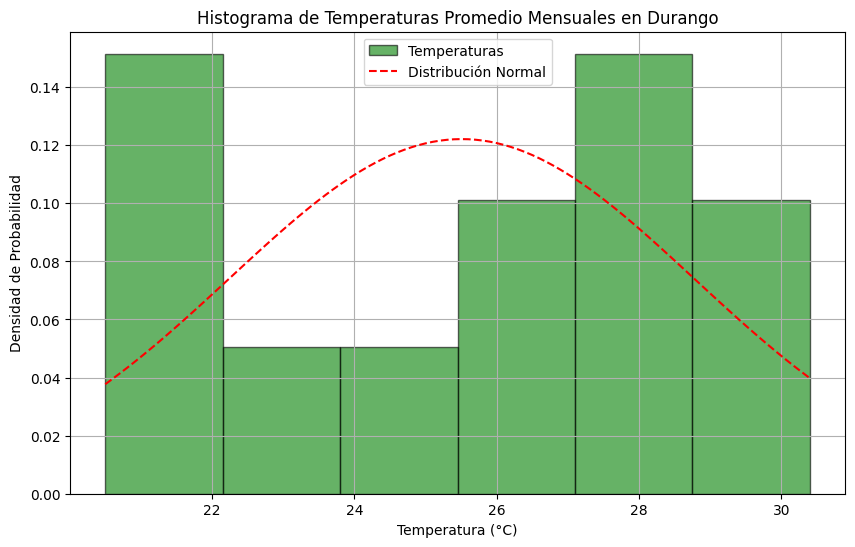

Los datos siguen una distribución normal.


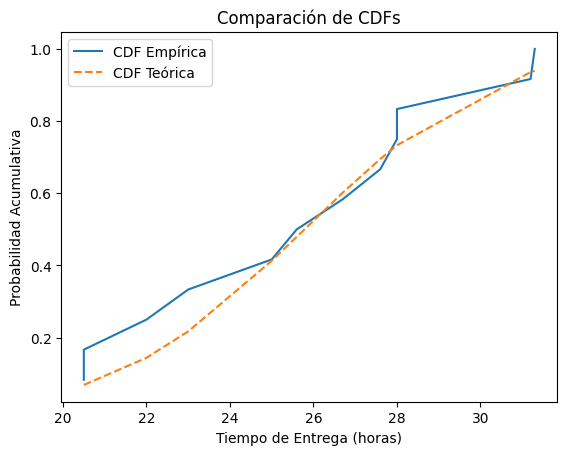

Estadístico KS: 0.11603158485517978
Valor-p: 0.9908505288993538


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

temperaturas = [20.5, 22.1, 24.5, 27.2, 30.0, 30.4, 28.0, 27.6, 26.7, 25.6, 23.0, 20.5]

media = np.mean(temperaturas)
desviacion_estandar = np.std(temperaturas)

print(f"Media de temperaturas: {media:.2f}°C")
print(f"Desviación estándar de temperaturas: {desviacion_estandar:.2f}°C")

plt.figure(figsize=(10, 6))
plt.hist(temperaturas, bins=6, density=True, alpha=0.6, color='green', edgecolor='black', label="Temperaturas")

x = np.linspace(min(temperaturas), max(temperaturas), 100)
pdf = norm.pdf(x, media, desviacion_estandar)
plt.plot(x, pdf, 'r--', label="Distribución Normal")

plt.title("Histograma de Temperaturas Promedio Mensuales en Durango")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

#Prueba de bondad
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm
from scipy.stats import norm

data = [20.5, 22.0, 25.0, 28.0, 31.2, 31.3, 28.0, 27.6, 26.7, 25.6, 23.0, 20.5]

mean, std = np.mean(data), np.std(data)

statistic, p_value = kstest(data, 'norm', args=(mean, std))

if p_value > 0.05:
  print("Los datos siguen una distribución normal.")
elif p_value <= 0.05:
  print("Los datos no siguen una distribución normal.")

sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

theoretical_cdf = norm.cdf(sorted_data, loc=mean, scale=std)

plt.plot(sorted_data, ecdf, label="CDF Empírica")

plt.plot(sorted_data, theoretical_cdf, label="CDF Teórica", linestyle="--")
plt.title("Comparación de CDFs")
plt.xlabel("Tiempo de Entrega (horas)")
plt.ylabel("Probabilidad Acumulativa")
plt.legend()
plt.show()
print(f"Estadístico KS: {statistic}")
print(f"Valor-p: {p_value}")

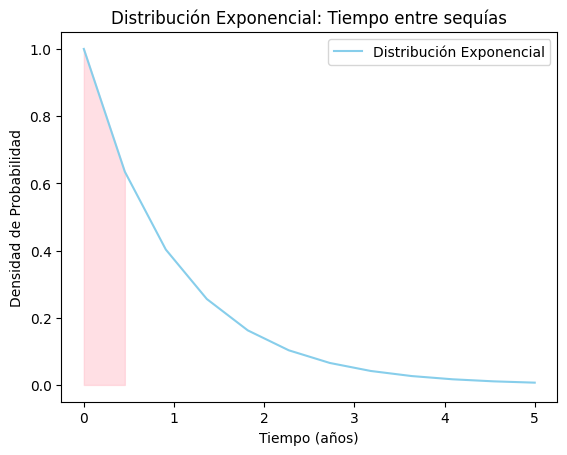

Probabilidad de sequía en 6 meses: 63.2121%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

lambda_ = 1 / 1

x = np.linspace(0, 5, 12)
pdf = expon.pdf(x, scale=1 / lambda_)

plt.plot(x, pdf, color='skyblue', label='Distribución Exponencial')
plt.fill_between(x, pdf, where=(x <= 0.5), color='pink', alpha=0.5)
plt.title('Distribución Exponencial: Tiempo entre sequías')
plt.xlabel('Tiempo (años)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()


prob_within_6_months = expon.cdf(1, scale=1 / lambda_)

print("Probabilidad de sequía en 6 meses: {:.4f}".format(prob_within_6_months * 100)+ "%")

Tabla de Contingencia:
          Pequeña  Grande
Sector 1   197480  157252
Sector 2   296219  336446

Estadístico Chi-cuadrado: 7119.4290
Grados de libertad: 1
Valor p: 0.0000
Conclusión: Existe una relación significativa entre el sector económico y el tamaño de la empresa (se rechaza H0).


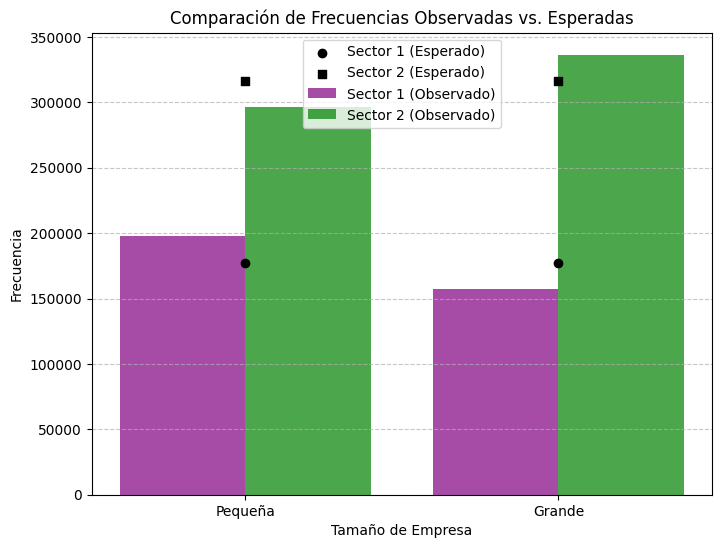

In [3]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

data = np.array([[197480, 157252],
                 [296219, 336446]])

sectores = ["Sector 1", "Sector 2"]
tamanos = ["Pequeña", "Grande"]
tabla_contingencia = pd.DataFrame(data, index=sectores, columns=tamanos)

print("Tabla de Contingencia:")
print(tabla_contingencia)


chi2_stat, p_valor, dof, frecuencias_esperadas = stats.chi2_contingency(tabla_contingencia)

print(f"\nEstadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p_valor:.4f}")

if p_valor < 0.05:
    print("Conclusión: Existe una relación significativa entre el sector económico y el tamaño de la empresa (se rechaza H0).")
else:
    print("Conclusión: No hay evidencia suficiente para afirmar que las variables están relacionadas (no se rechaza H0).")

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.4
indices = np.arange(len(tamanos))

plt.bar(indices - bar_width/2, data[0], bar_width, label="Sector 1 (Observado)", color='Purple', alpha=0.7)
plt.bar(indices + bar_width/2, data[1], bar_width, label="Sector 2 (Observado)", color='Green', alpha=0.7)

plt.scatter(indices, frecuencias_esperadas[0], color='black', marker='o', label="Sector 1 (Esperado)")
plt.scatter(indices, frecuencias_esperadas[1], color='black', marker='s', label="Sector 2 (Esperado)")

plt.xticks(indices, tamanos)
plt.xlabel("Tamaño de Empresa")
plt.ylabel("Frecuencia")
plt.title("Comparación de Frecuencias Observadas vs. Esperadas")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()